## Імпорт бібліотек

In [341]:
# Завантаження
import sys
!{sys.executable} -m pip install numpy pandas yfinance matplotlib

In [2]:
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt

## Завантаження даних і їх відображення

In [3]:
# boeing = pd.read_csv('BA.csv')
# gspc = pd.read_csv('^GSPC.csv')
boeing = yf.Ticker('BA').history(period='10y', interval='1mo').dropna(axis=0)
gspc = yf.Ticker('^GSPC').history(period='10y', interval='1mo')

In [4]:
boeing

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-02-01,55.481328,58.881541,55.164290,57.074436,91690200.0,0.0,0
2011-03-01,57.342244,59.367120,53.683115,58.936634,119791900.0,0.0,0
2011-04-01,59.223628,64.046655,56.505189,63.600227,95129600.0,0.0,0
2011-05-01,64.054632,64.293793,59.893272,62.205139,87491500.0,0.0,0
2011-06-01,62.469529,62.589741,56.330769,59.247883,103740100.0,0.0,0
...,...,...,...,...,...,...,...
2020-10-01,170.149994,175.559998,141.580002,144.389999,422001900.0,0.0,0
2020-11-01,145.750000,223.020004,143.380005,210.710007,526599500.0,0.0,0
2020-12-01,214.309998,244.080002,210.300003,214.059998,409410400.0,0.0,0


In [5]:
gspc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-02-01,1289.140015,1344.069946,1289.140015,1327.219971,59223660000,0,0
2011-03-01,1328.640015,1332.280029,1249.050049,1325.829956,89507640000,0,0
2011-04-01,1329.479980,1364.560059,1294.699951,1363.609985,77364810000,0,0
2011-05-01,1365.209961,1370.579956,1311.800049,1345.199951,81708980000,0,0
2011-06-01,1345.199951,1345.199951,1258.069946,1320.640015,86122730000,0,0
...,...,...,...,...,...,...,...
2020-10-01,3385.870117,3549.850098,3233.939941,3269.959961,89737600000,0,0
2020-11-01,3296.199951,3645.989990,3279.739990,3621.629883,100977880000,0,0
2020-12-01,3645.870117,3760.199951,3633.399902,3756.070068,96056410000,0,0


## Значення x та y

In [6]:
y = (gspc['Open'] + gspc['Close']) / 2
x = (boeing['Open'] + boeing['Close']) / 2

In [7]:
x

Date
2011-02-01     56.277882
2011-03-01     58.139439
2011-04-01     61.411928
2011-05-01     63.129885
2011-06-01     60.858706
                 ...    
2020-10-01    157.269997
2020-11-01    178.230003
2020-12-01    214.184998
2021-01-01    207.160004
2021-01-15    206.640007
Length: 121, dtype: float64

In [8]:
y

Date
2011-02-01    1308.179993
2011-03-01    1327.234985
2011-04-01    1346.544983
2011-05-01    1355.204956
2011-06-01    1332.919983
                 ...     
2020-10-01    3327.915039
2020-11-01    3458.914917
2020-12-01    3700.970093
2021-01-01    3766.430054
2021-01-15    3778.489990
Length: 121, dtype: float64

## Підрахунки вручну

### Спочатку знайдемо n (кількість місяців)

In [9]:
n = len(x)
assert n == len(y)

print(f'Кількість місяців: {n}')

Кількість місяців: 121


### Середні значення для x та y (і порівняння значень з методом pd.mean() )

In [10]:
x_mean = x.sum() / n
y_mean = y.sum() / n

print(f'Вручну\t\t\t\t|\tЗа допомогою вбудованого методу\n' +
      '-' * 75 + '\n' + 
      f'x середнє = {x_mean}\t|\tx.mean() = {x.mean()}\n' +
      f'y середнє = {y_mean}\t|\ty.mean() = {y.mean()}')

Вручну				|	За допомогою вбудованого методу
---------------------------------------------------------------------------
x середнє = 166.46948651628549	|	x.mean() = 166.46948651628549
y середнє = 2202.04078510379	|	y.mean() = 2202.04078510379


### Варіації x та y (і порівняння значень з методом pd.var() )

In [25]:
x_var = sum((x - x_mean) ** 2) / n
y_var = sum((y - y_mean) ** 2) / n

print(f'Вручну\t\t\t\t|\tЗа допомогою вбудованого методу\n' +
      '-' * 75 + '\n' +
      f'Var(x) = {x_var}\t|\tx.var() = {x.var()}\n'
      f'Var(y) = {y_var}\t|\ty.var() = {y.var()}')

Вручну				|	За допомогою вбудованого методу
---------------------------------------------------------------------------
Var(x) = 10828.399991262533	|	x.var() = 10918.636657856387
Var(y) = 424727.638760094	|	y.var() = 428267.03574976145


### Коваріація x та y (і порівняння з методом pd.cov(pd) )

In [12]:
cov = sum((x - x_mean) * (y - y_mean)) / n

print(f'Вручну\t\t\t\t|\tЗа допомогою вбудованого методу\n' +
      '-' * 75 + '\n' +
      f'Cov(x, y) = {cov}\t|\tx.cov(y) = {x.cov(y)}')

Вручну				|	За допомогою вбудованого методу
---------------------------------------------------------------------------
Cov(x, y) = 53020.565273081804	|	x.cov(y) = 53462.40331702417


### Аргументи a та b для знаходження Y^ = a + bx (і порівняння з методом np.polyfit(x, y, 1) )

In [13]:
b = cov / x_var
a = y_mean - b * x_mean
poly = np.polyfit(x, y, 1)

print(f'Вручну\t\t\t\t\t\t|\tЗа допомогою вбудованого методу\n' +
      '-' * 100 + '\n' +
      f'b = {b}, a = {a}\t|\tb = {poly[0]}, a = {poly[1]}')

Вручну						|	За допомогою вбудованого методу
----------------------------------------------------------------------------------------------------
b = 4.896435790685997, a = 1386.9336332683297	|	b = 4.896435790686, a = 1386.9336332683301


### Y^

In [14]:
y_hat = a + b * x

y_hat

Date
2011-02-01    1662.494669
2011-03-01    1671.609663
2011-04-01    1687.633193
2011-05-01    1696.045064
2011-06-01    1684.924379
                 ...     
2020-10-01    2156.996074
2020-11-01    2259.625401
2020-12-01    2435.676721
2021-01-01    2401.279290
2021-01-15    2398.733159
Length: 121, dtype: float64

### Абсолютна помилка (Absolute error)

In [15]:
e = sum(abs(y - y_hat))

print(f'Error = {e}\nMean Absolute Error = {e / n}')

Error = 33422.549196514825
Mean Absolute Error = 276.21941484723


### Коефіціент кореляції (і порівняння з методом pd.corr(pd) )

In [16]:
r = cov / ((x_var * y_var) ** 0.5)
print(f'Вручну\t\t\t\t|\tЗа допомогою вбудованого методу\n' +
      '-' * 75 + '\n' +
      f'r(x, y) = {r}\t|\tx.corr(y) = {x.corr(y)}')

Вручну				|	За допомогою вбудованого методу
---------------------------------------------------------------------------
r(x, y) = 0.7818203078414967	|	x.corr(y) = 0.7818203078414967


### Варіація Y^ (і порівняння з методом pd.var() )

In [17]:
y_hat_var = sum((y_hat - y_hat.mean()) ** 2) / n

print(f'Вручну\t\t\t\t|\tЗа допомогою вбудованого методу\n' +
      '-' * 75 + '\n' +
      f'Var(Y^) = {y_hat_var}\t|\ty_hat.var() = {y_hat.var()}')

Вручну				|	За допомогою вбудованого методу
---------------------------------------------------------------------------
Var(Y^) = 259611.79344552074	|	y_hat.var() = 261775.22505756674


### R^2 ( і перевірка зі знайдениім значенням)

In [18]:
r_hat_2 = y_hat_var / y_var

print(f'Var(Y^) / Var(Y) = {r_hat_2}\n'
      f'R^2 = {r ** 2}')

Var(Y^) / Var(Y) = 0.6112429937533724
R^2 = 0.6112429937533727


## Візуалізація 

Text(0, 0.5, 'S&P 500')

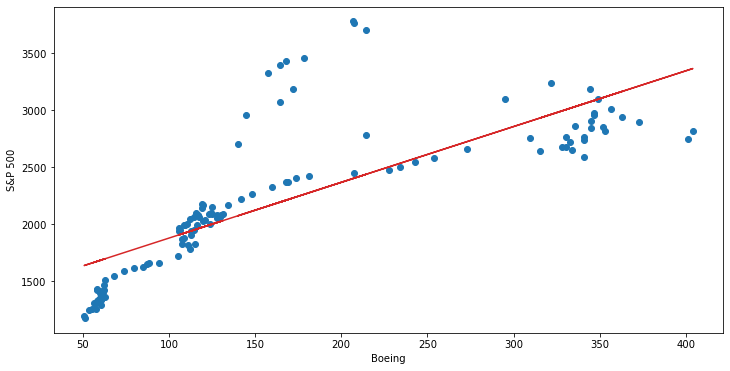

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y)
plt.plot(x, y_hat, color='C3')
plt.xlabel('Boeing')
plt.ylabel('S&P 500')

# За допомогою бібліотеки numpy

In [20]:
xn = np.linspace(x.min(), x.max(), len(x))
poly = np.polyfit(x, y, 1)
yn = np.polyval(poly, xn)
(y.max() * .9 - poly[1]) / poly[0]

411.2598314416951

## Візуалізація

Text(0, 0.5, 'S&P 500')

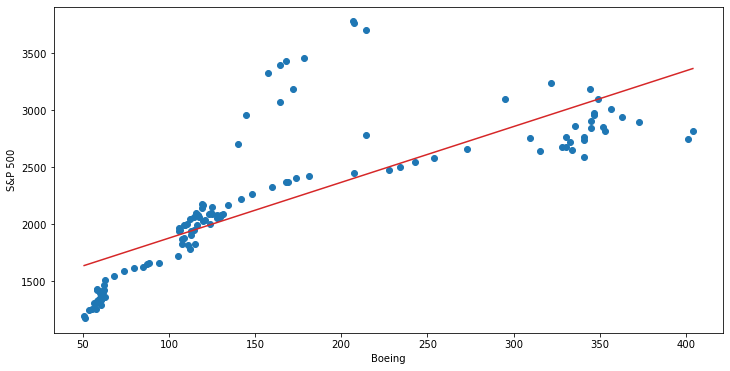

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y)
plt.plot(xn, yn, color='C3')
plt.xlabel('Boeing')
plt.ylabel('S&P 500')

## Висновки:
#### a. a = 1386.0118530887196, b = 4.902639566329808.<br/>
#### b. Економічна модель Y^ = a + bx є неточною, але гарно показує тенденції та залежність вартості Boeing від загальної ціни ринку (S&P 500).<br/>
#### c. Згідно з побудованою економічною моделлю, y = a + bx ~ 1386 + 4.9 * x, а отже при зміні x на n одиниць, y зміниться на ~ 4.9 * n одиниць.<br/>
#### d. Згідно з побудованою економічною моделлю, y = a + bx => x = (y - a) / b = (y / b) - (a / b) ~ (y / 4.9) - (1386 / 4.9) ~ (y / 4.9) - 282. Якщо ринок зросте на 10%, то ціна Boeing зросте на ~ 0.1 / 4.9 = 1/49 від своєї вартості, і коли ринок спаде на 10%, то ціна Boeing спаде на 1/49 від своєї вартості. Здійснимо прогноз,якщо ринок зросте на 10% від максимального значення:

In [22]:
prediction = (y.max() * 1.1 - a) / b
print(f'Якщо ринок зросте на 10% від максимального значення ({y.max()}), то Boeing очікувано буде коштувати {prediction}')

Якщо ринок зросте на 10% від максимального значення (3778.489990234375), то Boeing очікувано буде коштувати 565.5961753358325
